# Interaction-Free Quantum Measurement Simulation in Qiskit

Interaction-free measurement is a fascinating quantum phenomenon where you can detect an object without a photon physically interacting with it. This is based on the Elitzur-Vaidman bomb tester thought experiment. Here's a Qiskit implementation that simulates this effect.

In [1]:
import qiskit
print(qiskit.version.get_version_info())

C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


0.18.1


# A Little Background

__Interaction-Free Measurement (IFM)__ is a quantum trick that lets you figure out “is something there?” without ever touching it. 

Imagine a single particle—say, a photon—approaching a fork in the road that splits it into two paths, A and B. In quantum land, the photon travels both paths at once like a little wave.

If both paths are clear, the two wave-parts reunite at the end and interfere so that the photon always shows up at Detector 1.

Now hide a super-sensitive bomb in path B that explodes if it ever “feels” a photon. There are three possible outcomes:

Photon took path B → bomb explodes (you know it was there, but too late).

Photon took path A → nothing hits the bomb, so no interference happens at the end. The photon then has a 50/50 shot of going to Detector 1 or Detector 2. If it shows up at Detector 2, you now know the bomb is in B—and crucially, it never went off, so no photon ever hit it

Photon took path B but somehow didn’t explode the bomb (extremely unlikely in a perfect device).

Detecting the photon at Detector 2 is your “interaction-free” clue: you’ve learned the bomb’s there without setting it off.

__Why this matters__: it flips our intuition—normally you have to “touch” something to detect it. IFM underpins ideas like counterfactual computation (doing calculations without running the computer!) and low-damage imaging techniques where you don’t want to blast delicate samples

__References__:

https://en.wikipedia.org/wiki/Interaction-free_measurement

https://physics.illinois.edu/people/Kwiat/interaction-free-measurements

## Explanation:

1. **Circuit Setup**: We create a simple circuit with one qubit that represents our photon's state.

2. **Superposition**: The Hadamard gate puts the qubit in superposition (|0⟩ + |1⟩)/√2.

3. **Obstacle Simulation**: 
   - If an obstacle is present, the |1⟩ state would be absorbed (we simulate this with a measurement)
   - The |0⟩ state passes undisturbed
   - In a real experiment, we'd only consider trials where no absorption occurred

4. **Second Hadamard**: This interferes the possible states.

5. **Measurement**: The final measurement shows:
   - With obstacle: More likely to measure |1⟩ (indicating the obstacle's presence without direct interaction)
   - Without obstacle: Always measures |0⟩

## Interpretation of Results:
- When the obstacle is present, there's a 25% chance to detect its presence without interaction (showing as |1⟩ in the final measurement)
- 25% of runs will have the photon absorbed (which we discard in a real experiment)
- 50% will show |0⟩ (no information)
- Without the obstacle, you always get |0⟩

This demonstrates the core idea of interaction-free measurement - gaining information about an object without direct interaction in a subset of cases.

With Obstacle Circuit display:
     ┌───┐┌─┐┌───┐┌─┐
q_0: ┤ H ├┤M├┤ H ├┤M├
     └───┘└╥┘└───┘└╥┘
c: 1/══════╩═══════╩═
           0       0 
Without Obstacle Circuit display:
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
With obstacle present: {'0': 498, '1': 502}
Without obstacle: {'0': 1000}


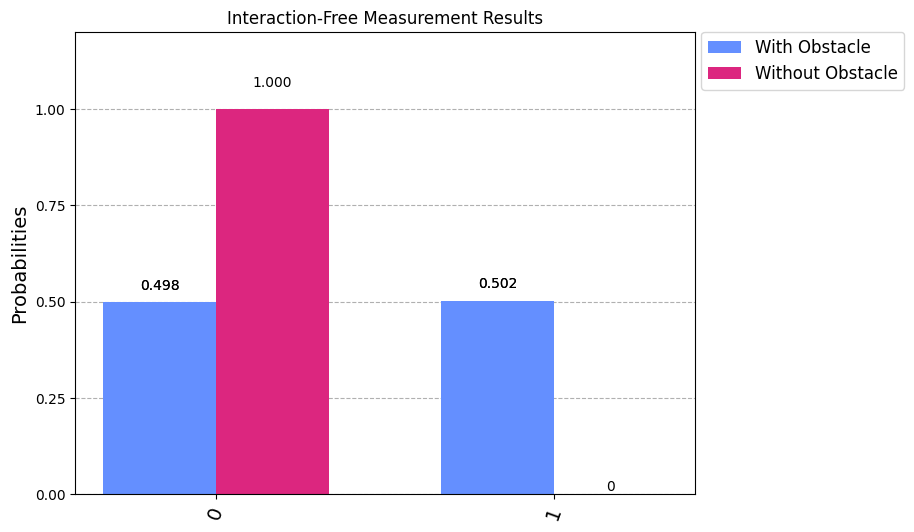

In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def interaction_free_measurement(obstacle_present=True):
    """
    Simulates interaction-free measurement.
    
    Args:
        obstacle_present (bool): Whether the absorbing obstacle is present
    
    Returns:
        dict: Measurement results
    """
    # Create a quantum circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)
    
    # Apply Hadamard gate to create superposition
    qc.h(0)
    
    # If obstacle is present, it would absorb the |1> state
    # We simulate this with a measurement that destroys the state if it's |1>
    if obstacle_present:
        # Measure in the computational basis
        qc.measure(0, 0)
        # If we measure |1>, the photon was absorbed (we discard these cases)
        # If we measure |0>, we continue
        # In a real experiment, we would post-select on not getting absorption
        pass
    
    # Apply another Hadamard
    qc.h(0)
    
    # Measure the final state
    qc.measure(0, 0)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1000).result()
    counts = result.get_counts(qc)
    
    return (counts, qc)

# Run simulations for both cases
counts_with_obstacle, qc = interaction_free_measurement(obstacle_present=True)
#Display the circuit
print("With Obstacle Circuit display:")
print(qc.draw())

counts_without_obstacle, qc = interaction_free_measurement(obstacle_present=False)
#Display the circuit
print("Without Obstacle Circuit display:")
print(qc.draw())

# Display results
print("With obstacle present:", counts_with_obstacle)
print("Without obstacle:", counts_without_obstacle)

# Plot the results
legend = ['With Obstacle', 'Without Obstacle']
plot_histogram([counts_with_obstacle, counts_without_obstacle], legend=legend, figsize=(8, 6))
plt.title('Interaction-Free Measurement Results')
plt.show()

# Mathematical Analysis

## No‐Obstacle Case

Start in \|ψ₀⟩ = \|0⟩.

After the first H: \|ψ₁⟩ = H\|0⟩ = ( \|0⟩ + \|1⟩ )/√2

After the second H: H\|ψ₁⟩ = H[(\|0⟩+ \|1⟩)/√2] = \|0⟩ (since H² = I)

Final measurement in Z‐basis thus yields • P(0) = 1 • P(1) = 0

## Obstacle‐Present Case

Here the first Measure represents “photon‐absorbing if in state \|1⟩,” modeled by a projective collapse.

After H: \|ψ₁⟩ = ( \|0⟩ + \|1⟩ )/√2

First measurement (Z-basis)

With probability ½: outcome = 1 ⇒ photon “absorbed.” The qubit collapses to \|1⟩ (we’d normally discard these shots).

With probability ½: outcome = 0 ⇒ no absorption. The qubit collapses to \|0⟩ and continues.

Second Hadamard, then final Measure – If collapsed to \|0⟩: H\|0⟩ = ( \|0⟩ + \|1⟩ )/√2 ⇒ P(0) = ½, P(1) = ½ – If (un‐discarded) collapsed to \|1⟩: H\|1⟩ = ( \|0⟩ – \|1⟩ )/√2 ⇒ P(0) = ½, P(1) = ½

Combine branches Unconditional (i.e. including “absorbed” shots, if you kept measuring anyway): P(final = 0) = ½·½ + ½·½ = ½ P(final = 1) = ½·½ + ½·½ = ½

If you post‐select on only the “no‐absorption” branch (the true IFM outcome): P(final = 0 | no‐absorb) = (½·½)/(½) = ½ P(final = 1 | no‐absorb) = (½·½)/(½) = ½

## What This Means Physically
Without obstacle you always get “0.”

With obstacle

50 % of the time the photon is absorbed outright.

Of the remaining 50 %, half land at “1” — these are interaction‐free detections.

So the absolute probability to detect the obstacle without interaction is ¼.

## Bottom line: 

- Ideal no-obstacle run → always “0.”
- Ideal obstacle run → 50 % absorption, 25 % harmless “0,” 25 % interaction-free “1.”

This matches the above counts (~0.5/0.5 with obstacle, 1/0 without), up to shot noise.

##  Some of real-world applications of interaction-free measurement:

- __Low-damage imaging in electron microscopy__: By detecting specimens without directly scattering electrons off them, IFM can greatly reduce radiation damage to delicate biological or molecular samples during imaging.

- __Counterfactual quantum communication__: Protocols based on IFM principles let two parties exchange bits of information without any physical particle traveling through the channel. First laboratory demonstrations appeared in 2017.